# Statistical Learning with Python

A comprehensive introduction to statistical learning using Python, covering data manipulation, visualization, and statistical analysis.

## Contents
1. Setup and Imports
2. Vectors and Matrices
3. Random Variables
4. Data Visualization
5. Advanced Graphics
6. Indexing and Data Manipulation
7. Loading and Analyzing Real Data
8. Summary Statistics

## Setup and Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Vectors and Matrices

In [4]:
# Vector operations
x1 = np.array([1, 2, 3, 4])
x2 = np.array([1, 0, 1, 0])
y = x1 + x2

print(f"x1: {x1}")
print(f"x2: {x2}")
print(f"y = x1 + x2: {y}")
print(f"Length: {len(y)}")

x1: [1 2 3 4]
x2: [1 0 1 0]
y = x1 + x2: [2 2 4 4]
Length: 4


In [5]:
# Matrix operations
x = np.array([[1, 3], [2, 4]])

print("Matrix x:")
print(x)
print("\nSquare root:")
print(np.sqrt(x))

Matrix x:
[[1 3]
 [2 4]]

Square root:
[[1.         1.73205081]
 [1.41421356 2.        ]]


## Random Variables

In [6]:
np.random.seed(123)
z1 = np.random.randn(10)

mu = np.mean(z1)
s2 = np.var(z1, ddof=1)

print(f"Random values: {z1}")
print(f"Mean: {mu:.4f}")
print(f"Variance: {s2:.4f}")

Random values: [-1.0856306   0.99734545  0.2829785  -1.50629471 -0.57860025  1.65143654
 -2.42667924 -0.42891263  1.26593626 -0.8667404 ]
Mean: -0.2695
Variance: 1.6983


## Data Visualization

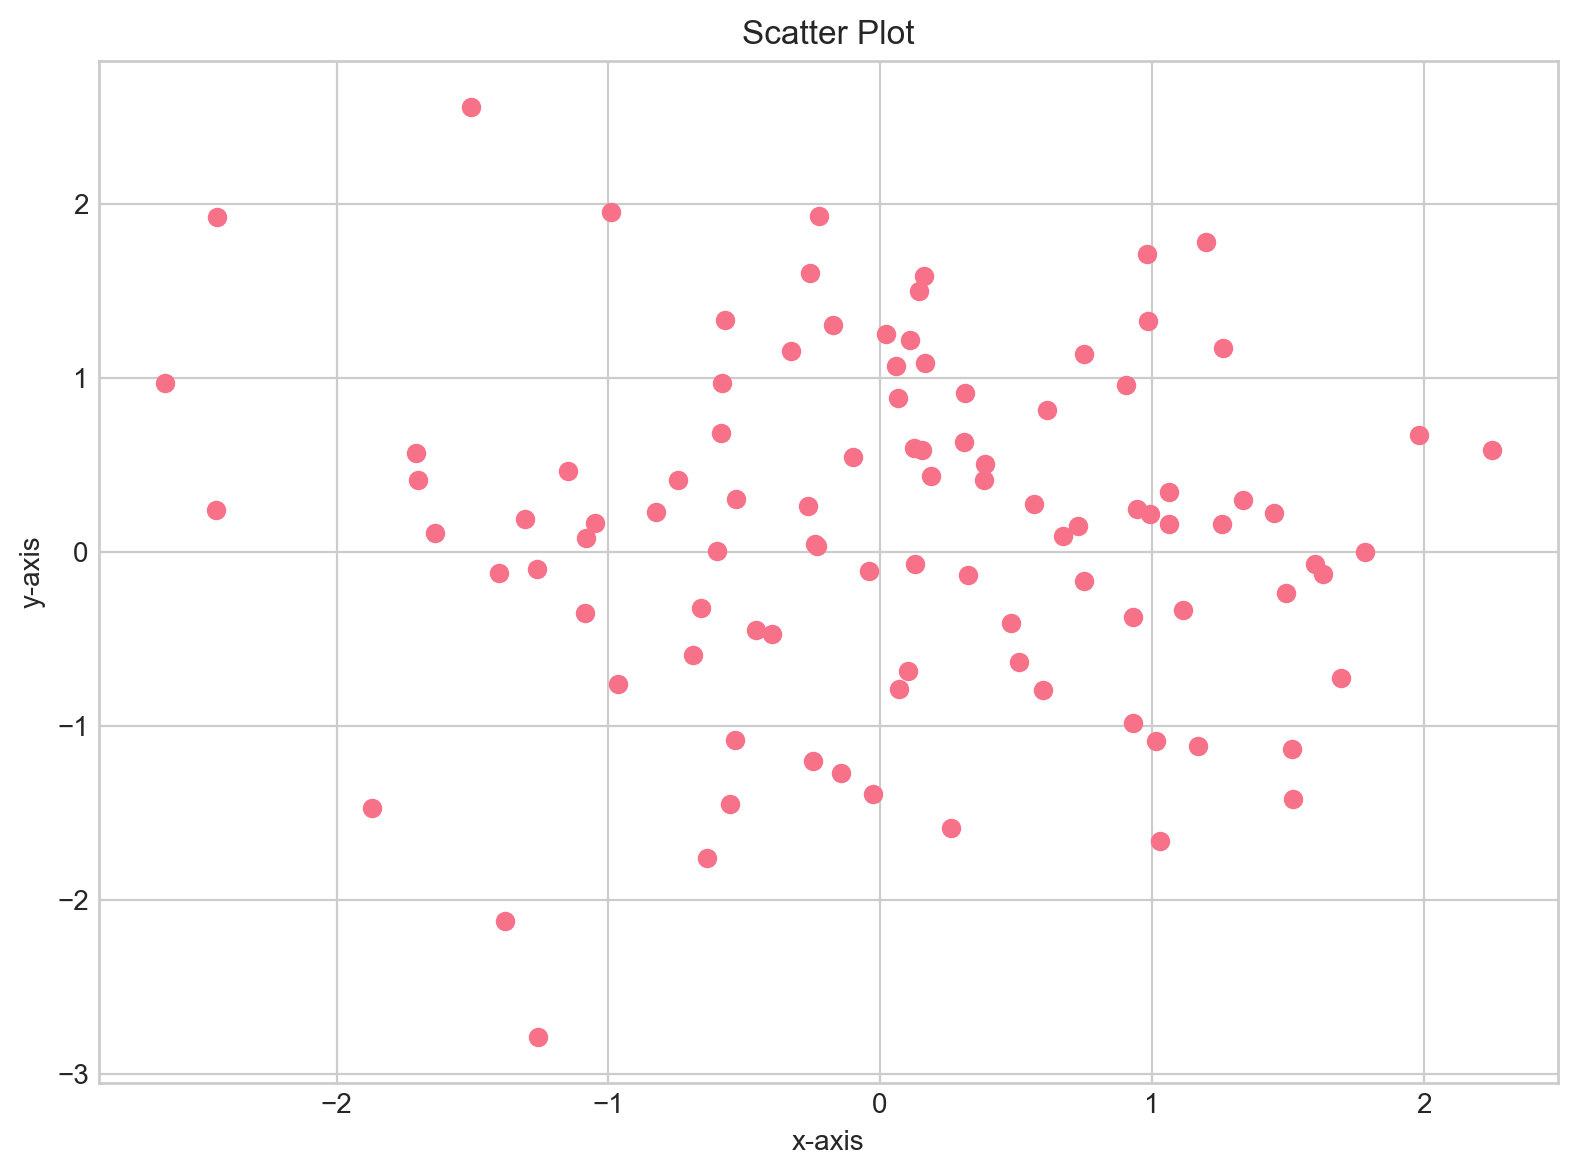

In [9]:
# Scatter plot
x1 = np.random.randn(100)
x2 = np.random.randn(100)

plt.figure(figsize=(8, 6))
plt.scatter(x1, x2, alpha=1)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Scatter Plot')
plt.tight_layout()
plt.show()

## Advanced Graphics

In [10]:
# Create function grid
x = np.linspace(-np.pi, np.pi, 50)
y = np.linspace(-np.pi, np.pi, 50)
X, Y = np.meshgrid(x, y)
f = np.cos(Y) / (1 + X**2)

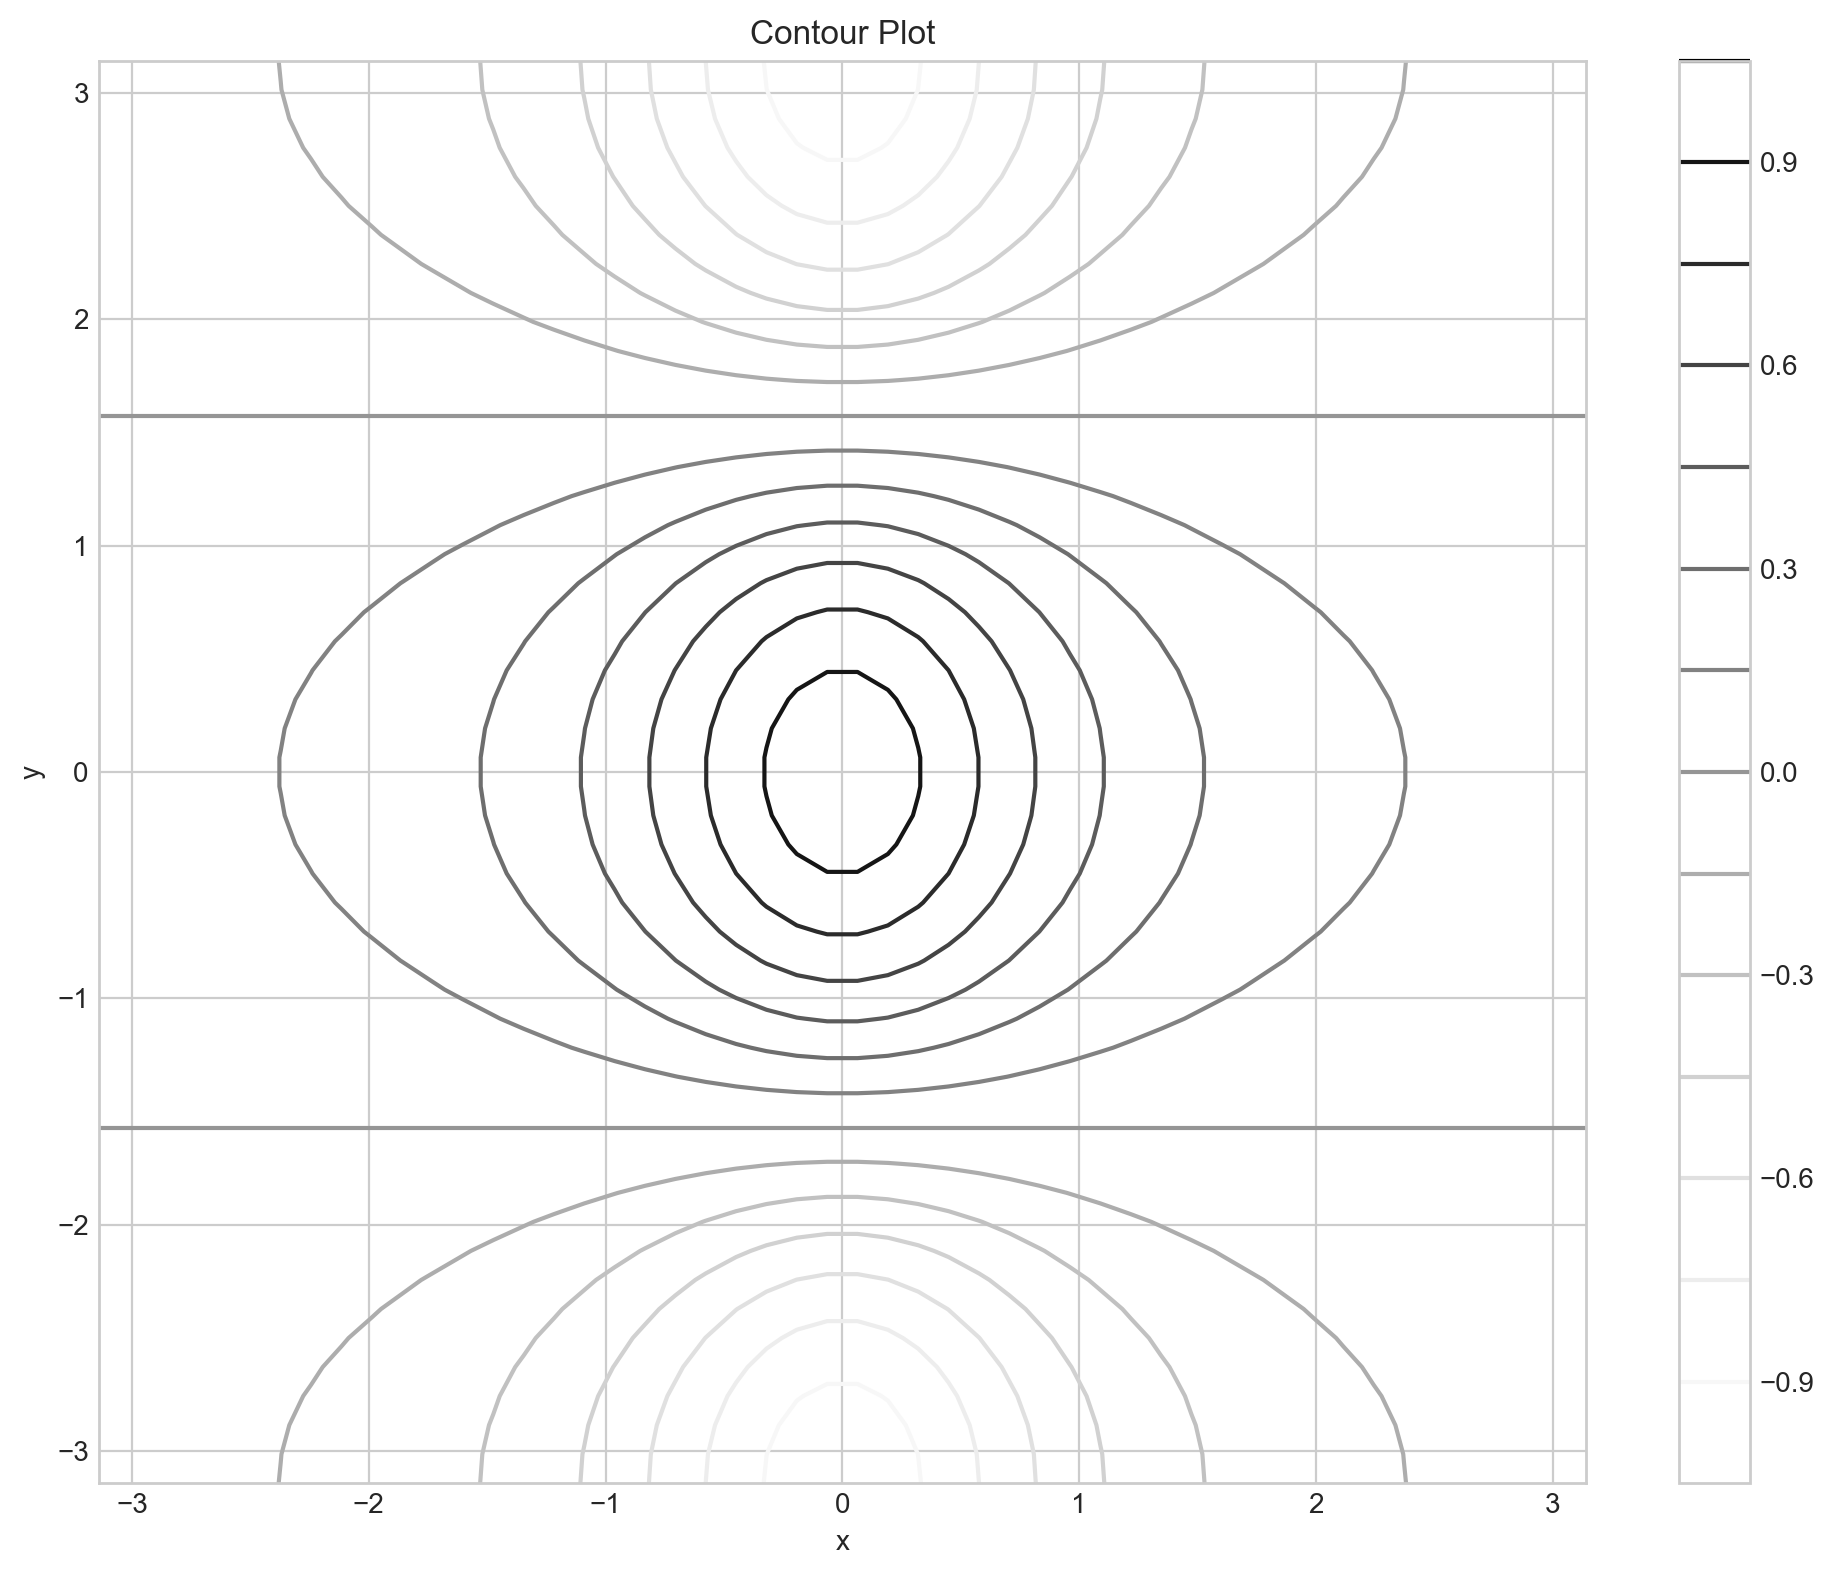

In [11]:
# Contour plot
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, f, levels=15)
plt.colorbar(contour)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot')
plt.tight_layout()
plt.show()

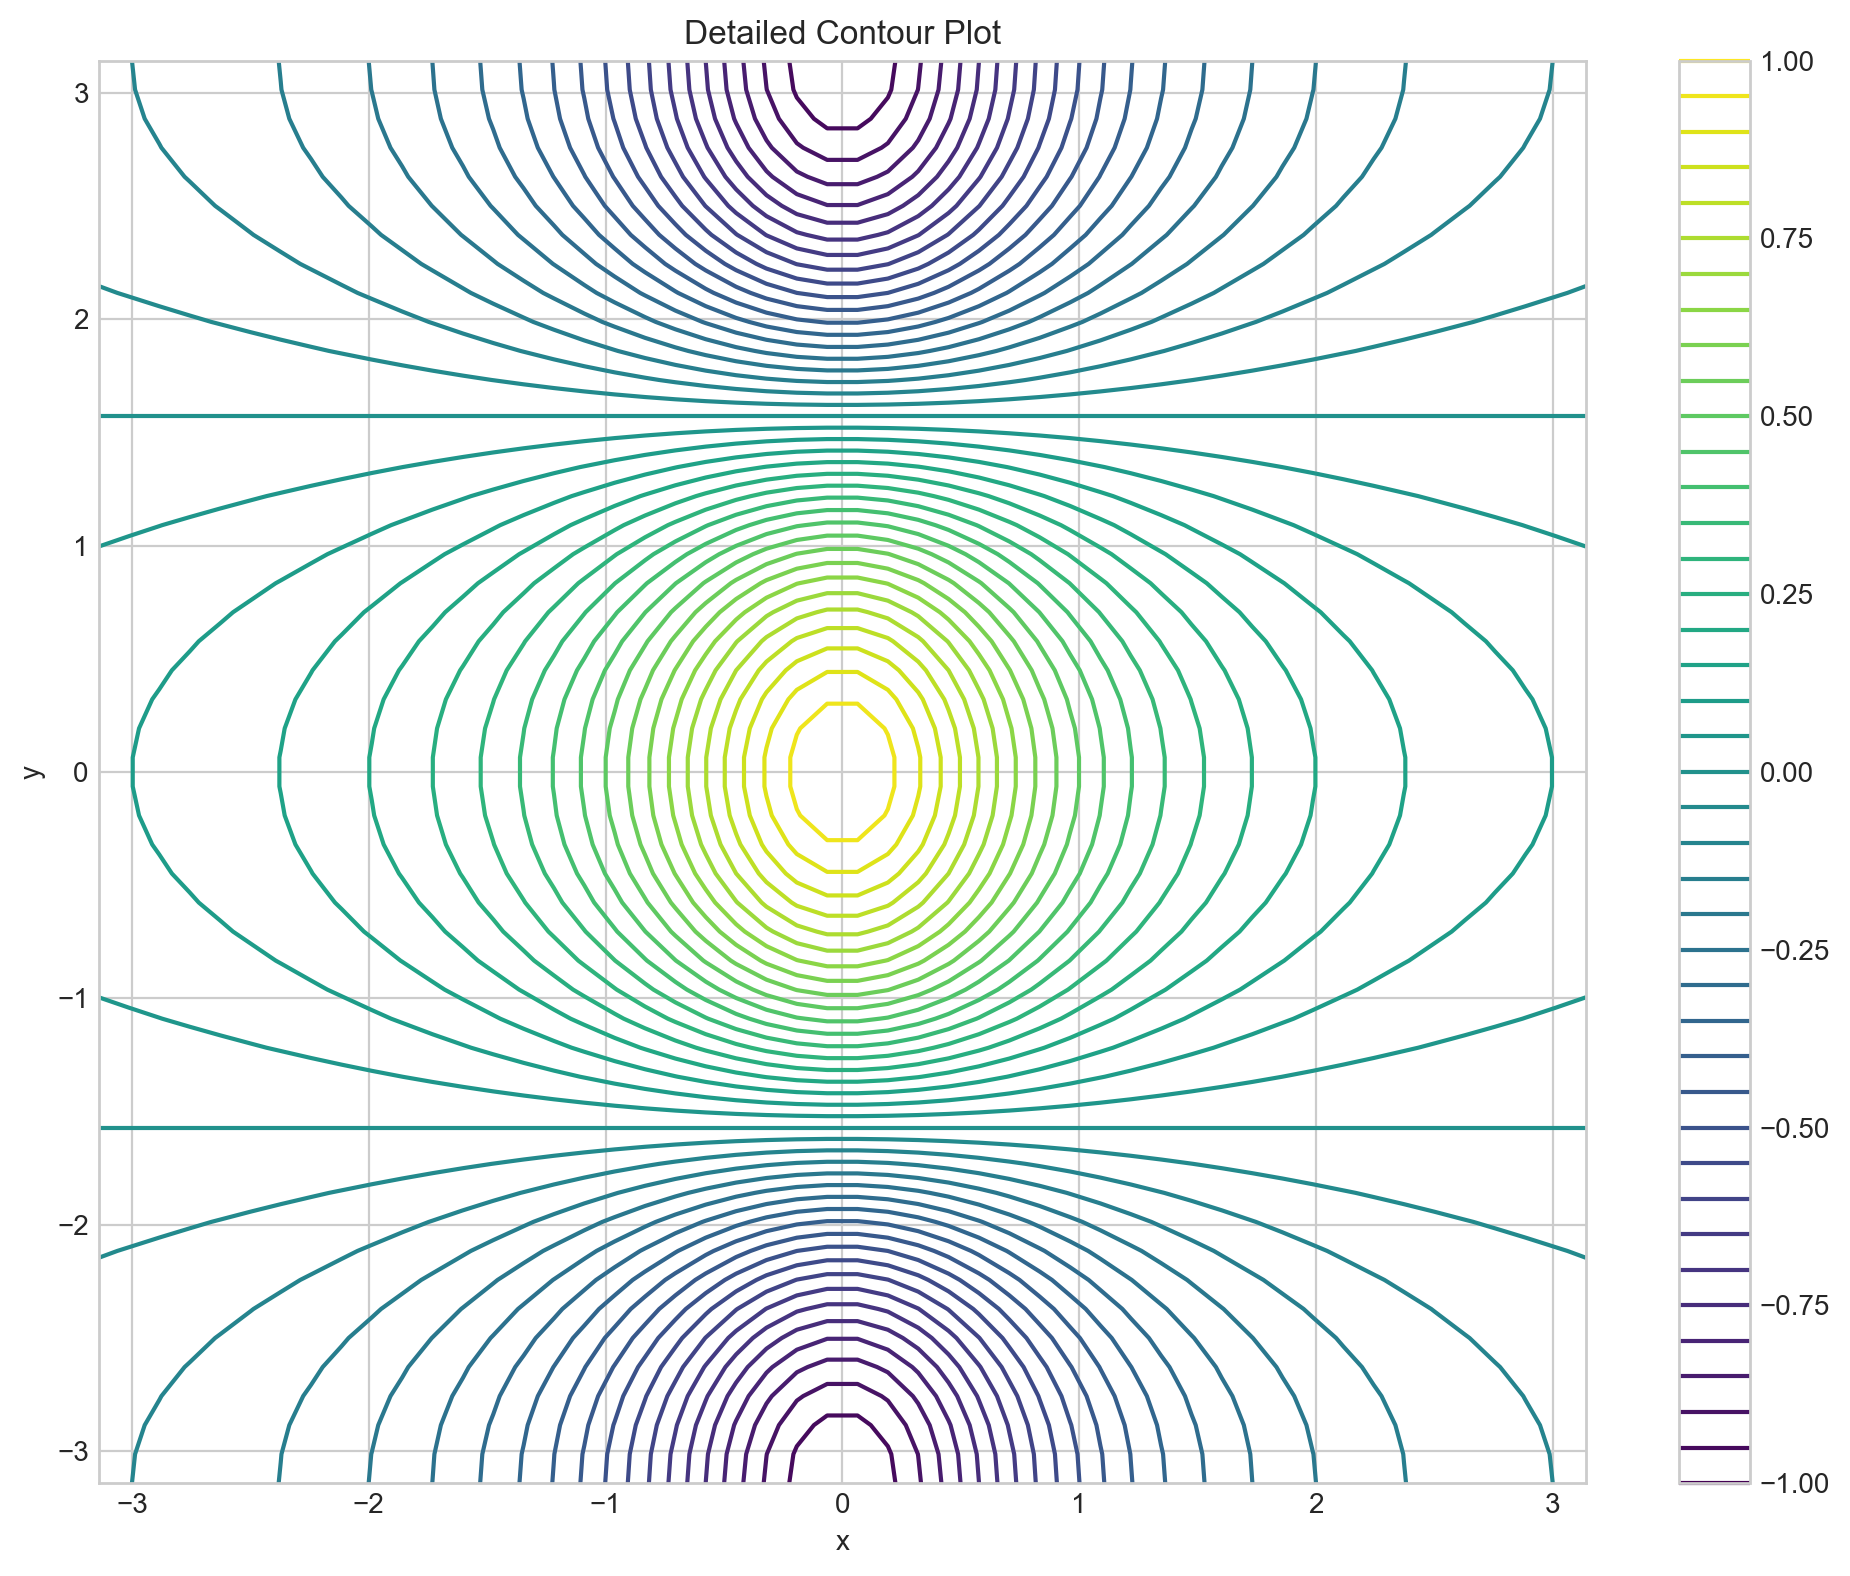

In [12]:
# Contour plot with more detail
plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, f, levels=45, cmap='viridis')
plt.colorbar(contour)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Detailed Contour Plot')
plt.tight_layout()
plt.show()

In [13]:
# Antisymmetric function
fa = (f - f.T) / 2

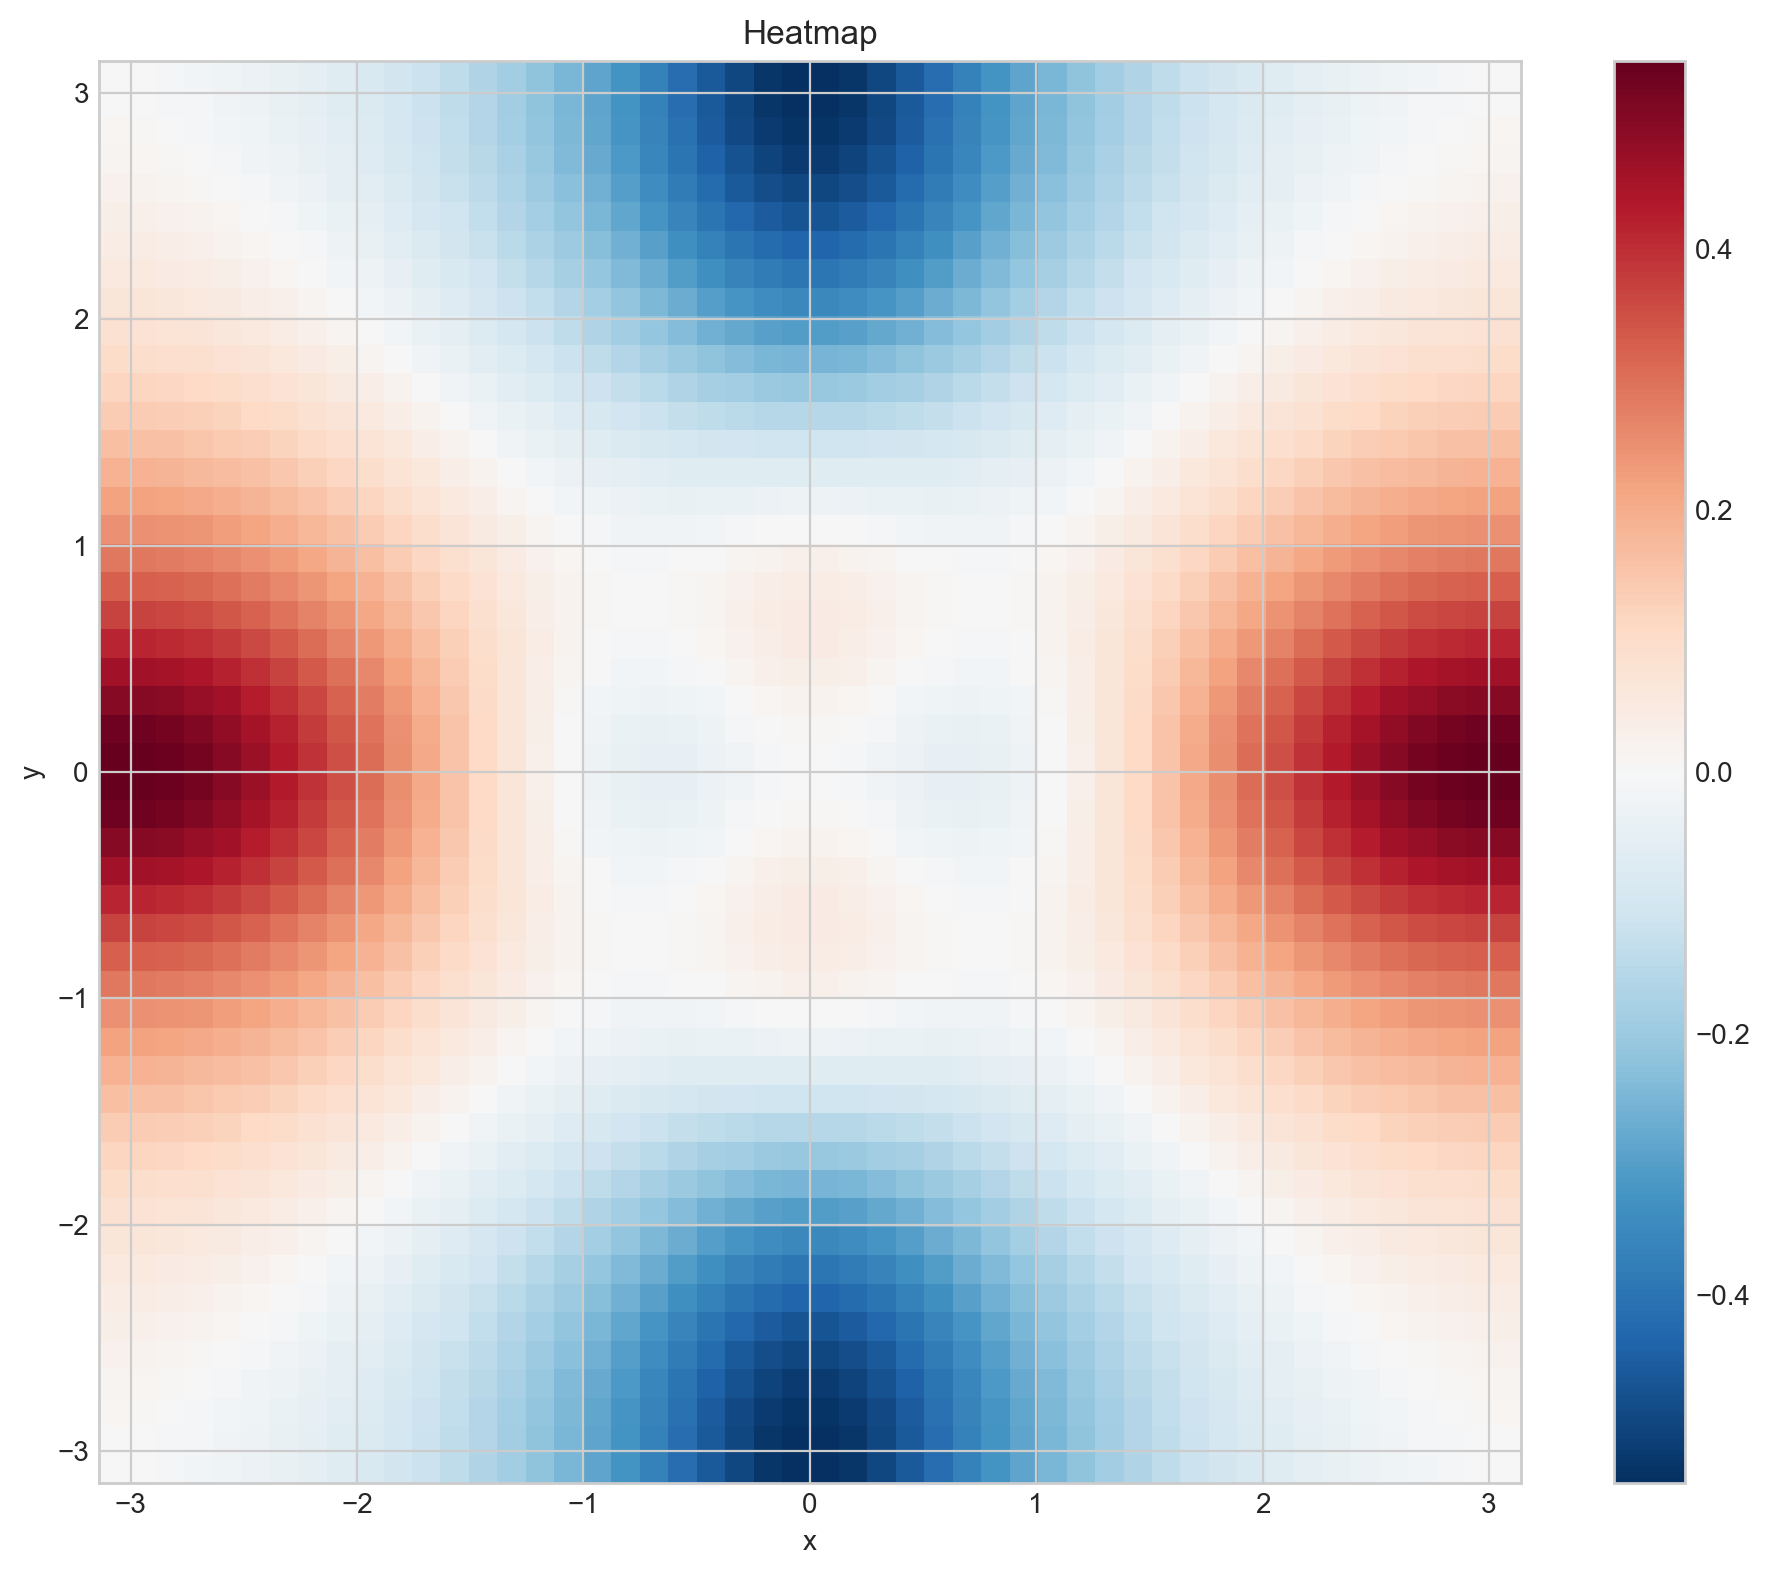

In [14]:
# Heatmap
plt.figure(figsize=(10, 8))
plt.imshow(fa, extent=[-np.pi, np.pi, -np.pi, np.pi], origin='lower', cmap='RdBu_r')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Heatmap')
plt.tight_layout()
plt.show()

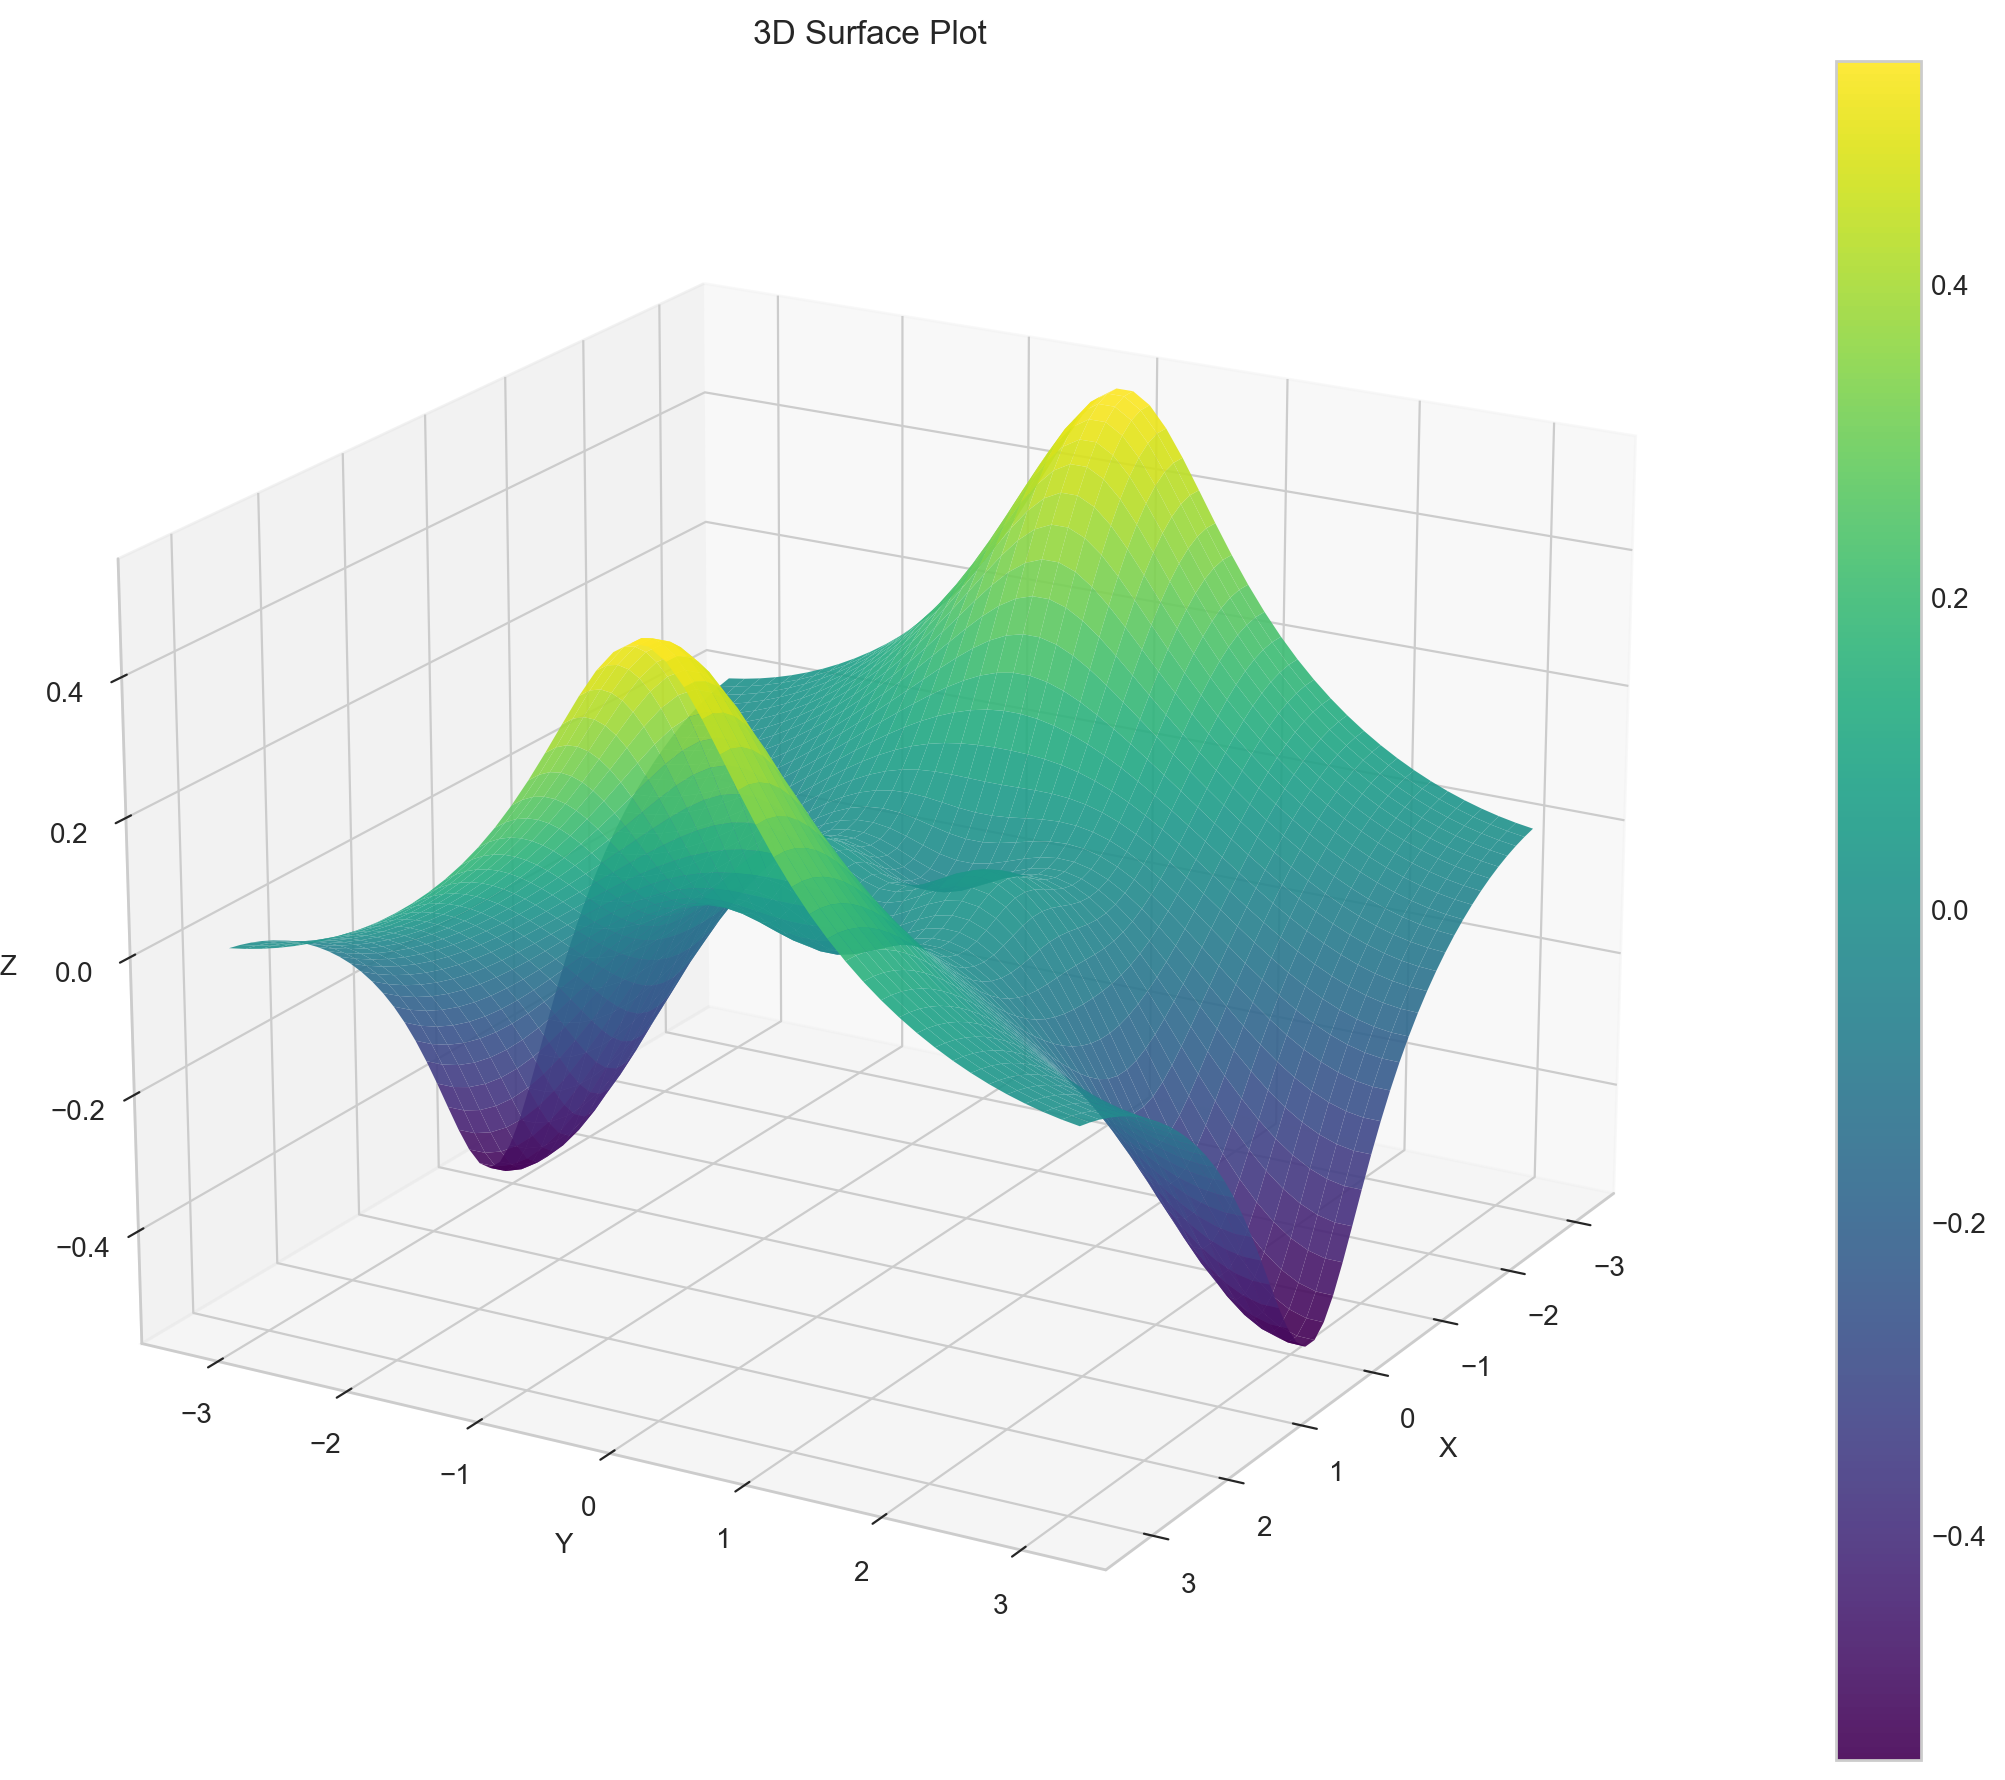

In [15]:
# 3D surface plot
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, fa, cmap='viridis', alpha=0.9)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20, azim=30)
plt.colorbar(surf)
plt.title('3D Surface Plot')
plt.tight_layout()
plt.show()

## Indexing and Data Manipulation

In [16]:
# Create a 4x4 matrix
A = np.arange(1, 17).reshape(4, 4)
print("Matrix A:")
print(A)

Matrix A:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]


In [17]:
# Indexing examples
print(f"Element at [0,1]: {A[0, 1]}")
print(f"\nSubmatrix [0:2, 1:3]:\n{A[0:2, 1:3]}")
print(f"\nFirst row: {A[0, :]}")
print(f"\nSecond column: {A[:, 1]}")
print(f"\nDimensions: {A.shape}")

Element at [0,1]: 2

Submatrix [0:2, 1:3]:
[[2 3]
 [6 7]]

First row: [1 2 3 4]

Second column: [ 2  6 10 14]

Dimensions: (4, 4)


In [18]:
# Advanced indexing
print(f"Rows [0,2], columns [1,3]:\n{A[[0,2], :][:, [1,3]]}")
print(f"\nAll rows except [0,2]:\n{A[[1,3], :]}")

Rows [0,2], columns [1,3]:
[[ 2  4]
 [10 12]]

All rows except [0,2]:
[[ 5  6  7  8]
 [13 14 15 16]]


## Loading and Analyzing Real Data

We'll work with the Auto MPG dataset.

In [19]:
# Load Auto dataset
# Download from: http://www-bcf.usc.edu/~gareth/ISL/Auto.csv
# Or use the UCI ML Repository version

try:
    Auto = pd.read_csv("Auto.csv", na_values='?')
    Auto = Auto.dropna()
    print("Dataset loaded successfully!")
    print(f"Shape: {Auto.shape}")
except FileNotFoundError:
    print("Auto.csv not found. Downloading from UCI...")
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
    column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']
    Auto = pd.read_csv(url, sep='\s+', names=column_names, na_values='?')
    Auto = Auto.dropna()
    print("Dataset downloaded and loaded!")
    print(f"Shape: {Auto.shape}")

Auto.csv not found. Downloading from UCI...
Dataset downloaded and loaded!
Shape: (392, 9)


In [20]:
# Display first few rows
Auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0  3504.0          12.0    70   
1  15.0          8         350.0       165.0  3693.0          11.5    70   
2  18.0          8         318.0       150.0  3436.0          11.0    70   
3  16.0          8         304.0       150.0  3433.0          12.0    70   
4  17.0          8         302.0       140.0  3449.0          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [21]:
# Column names
print(Auto.columns.tolist())

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'name']


## Data Visualization with Real Data

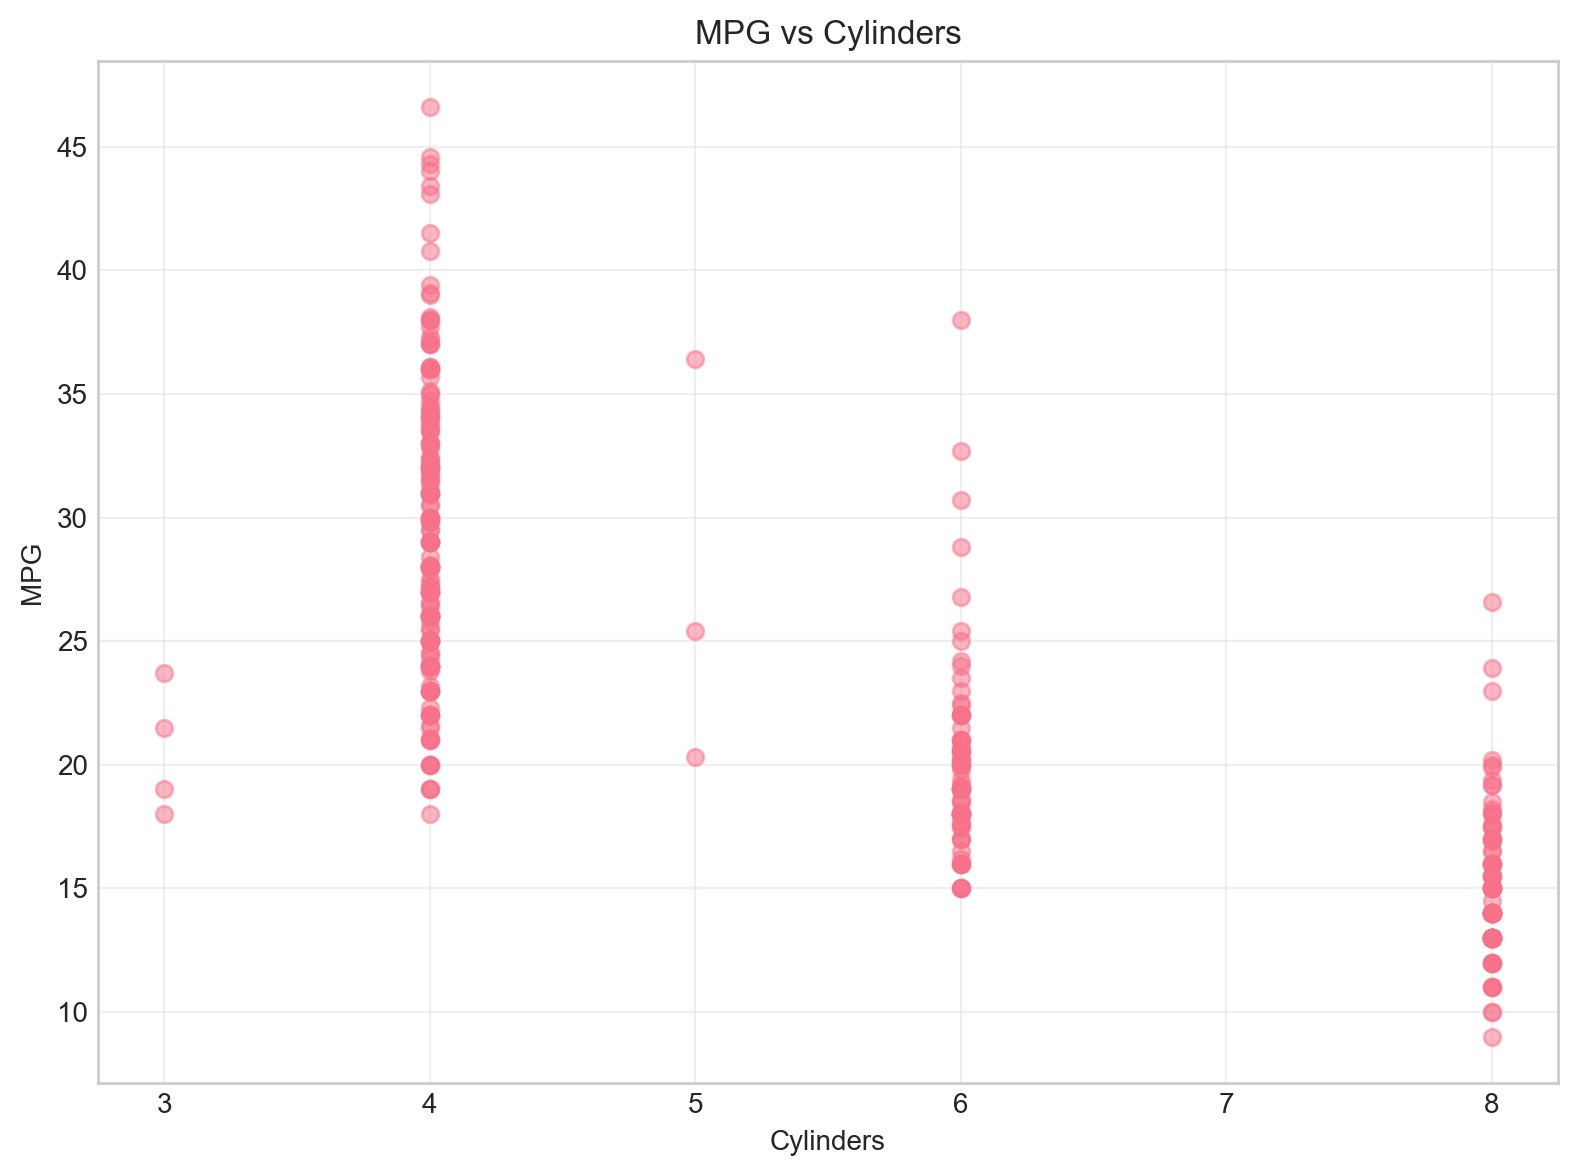

In [22]:
# Scatter plot: MPG vs Cylinders
plt.figure(figsize=(8, 6))
plt.scatter(Auto['cylinders'], Auto['mpg'], alpha=0.5)
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('MPG vs Cylinders')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

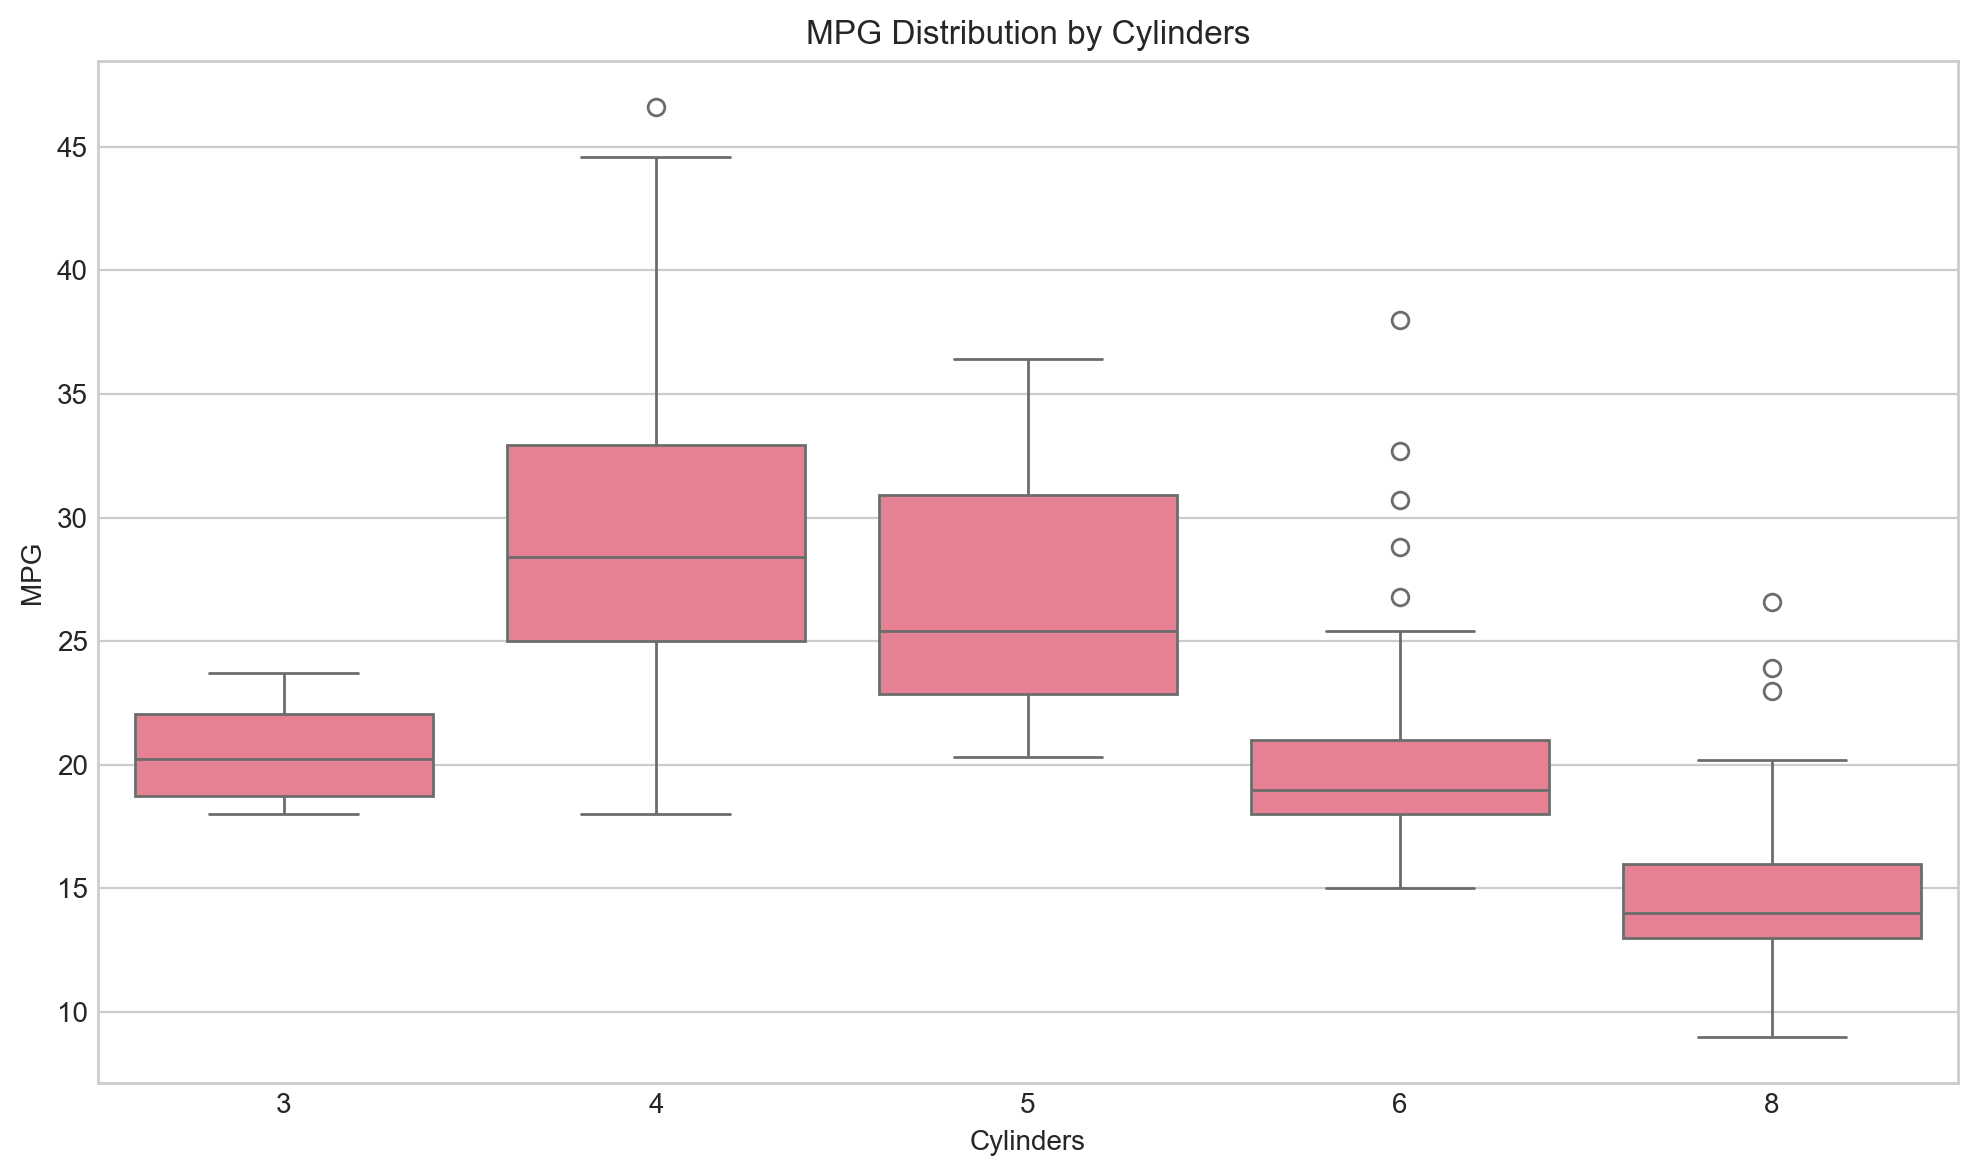

In [23]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=Auto, x='cylinders', y='mpg')
plt.xlabel('Cylinders')
plt.ylabel('MPG')
plt.title('MPG Distribution by Cylinders')
plt.tight_layout()
plt.show()

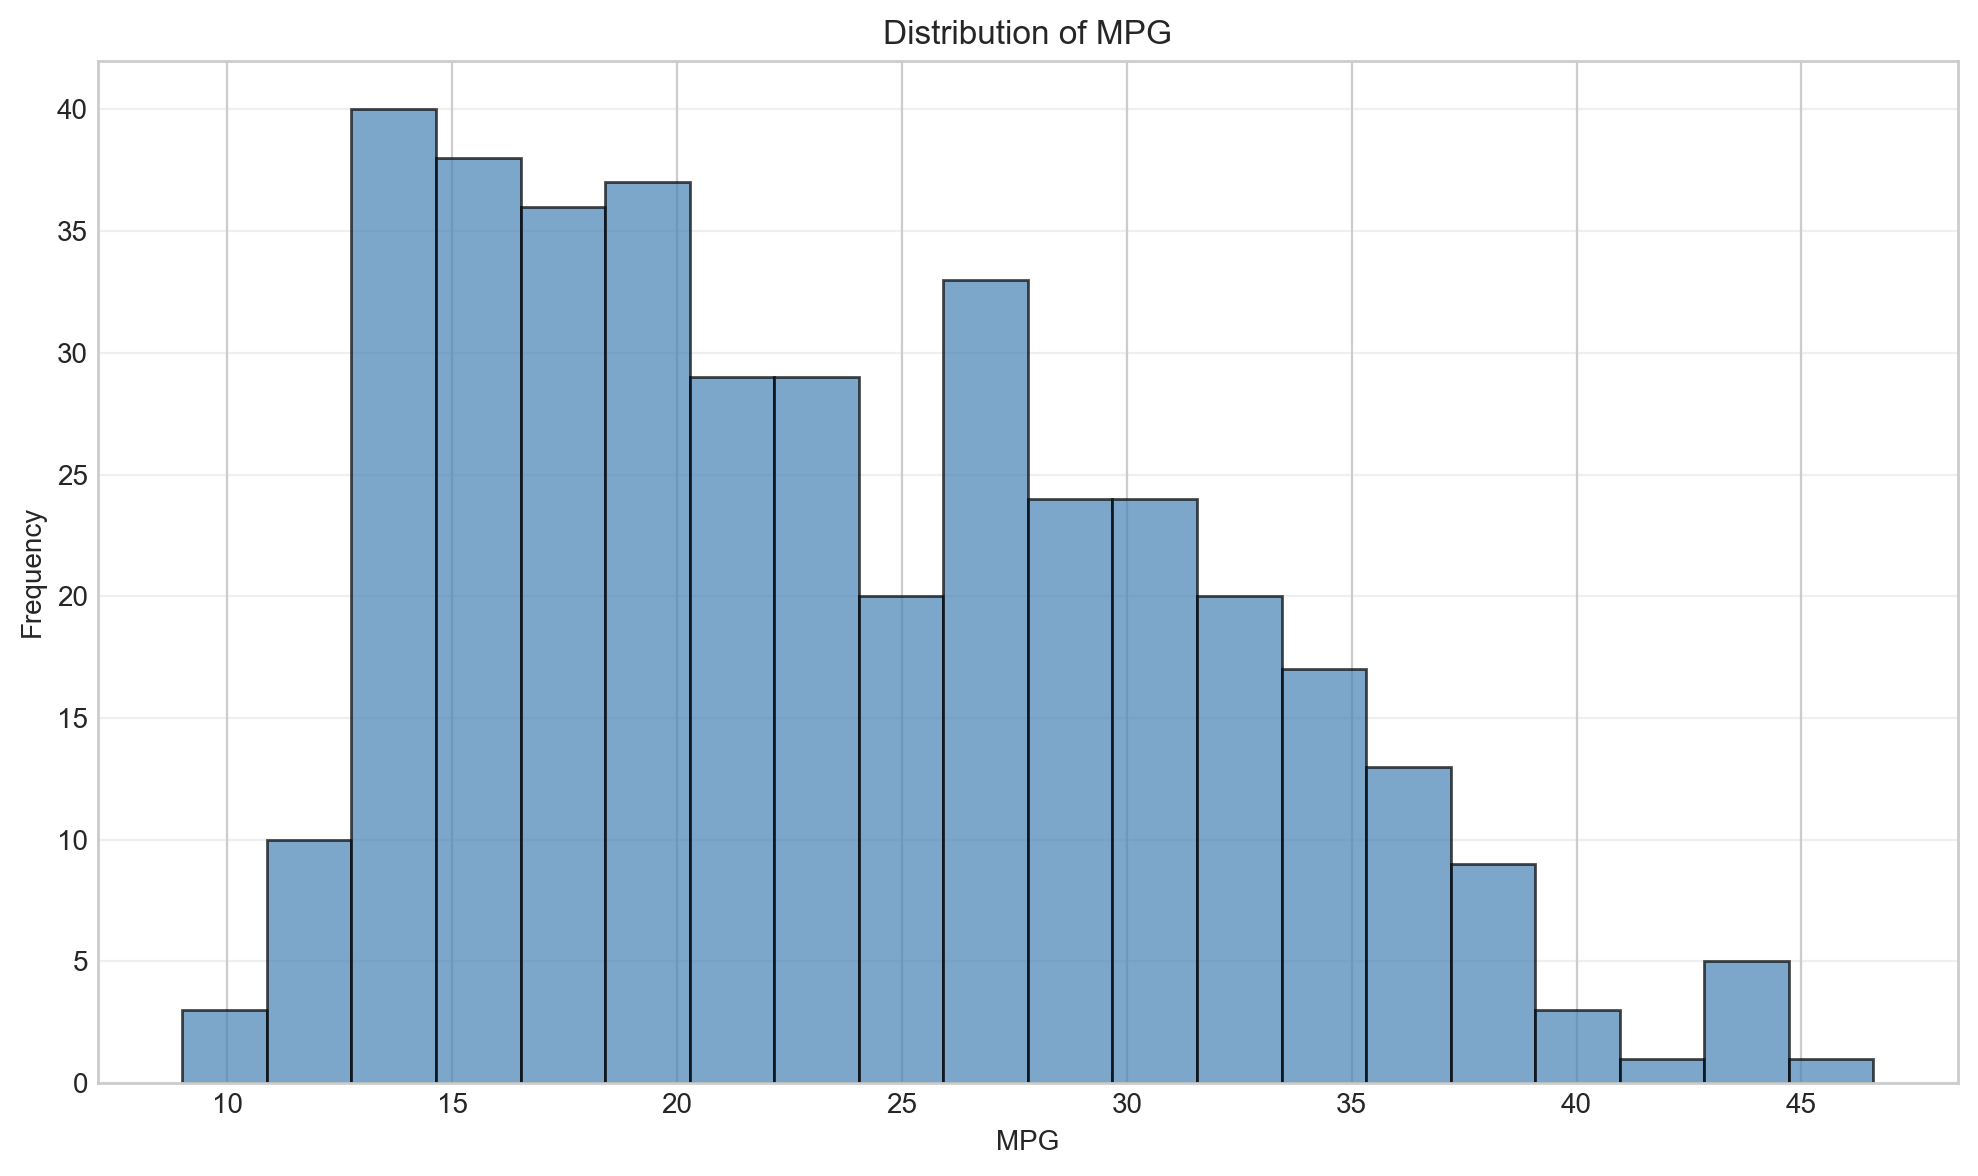

In [24]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(Auto['mpg'], bins=20, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.title('Distribution of MPG')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

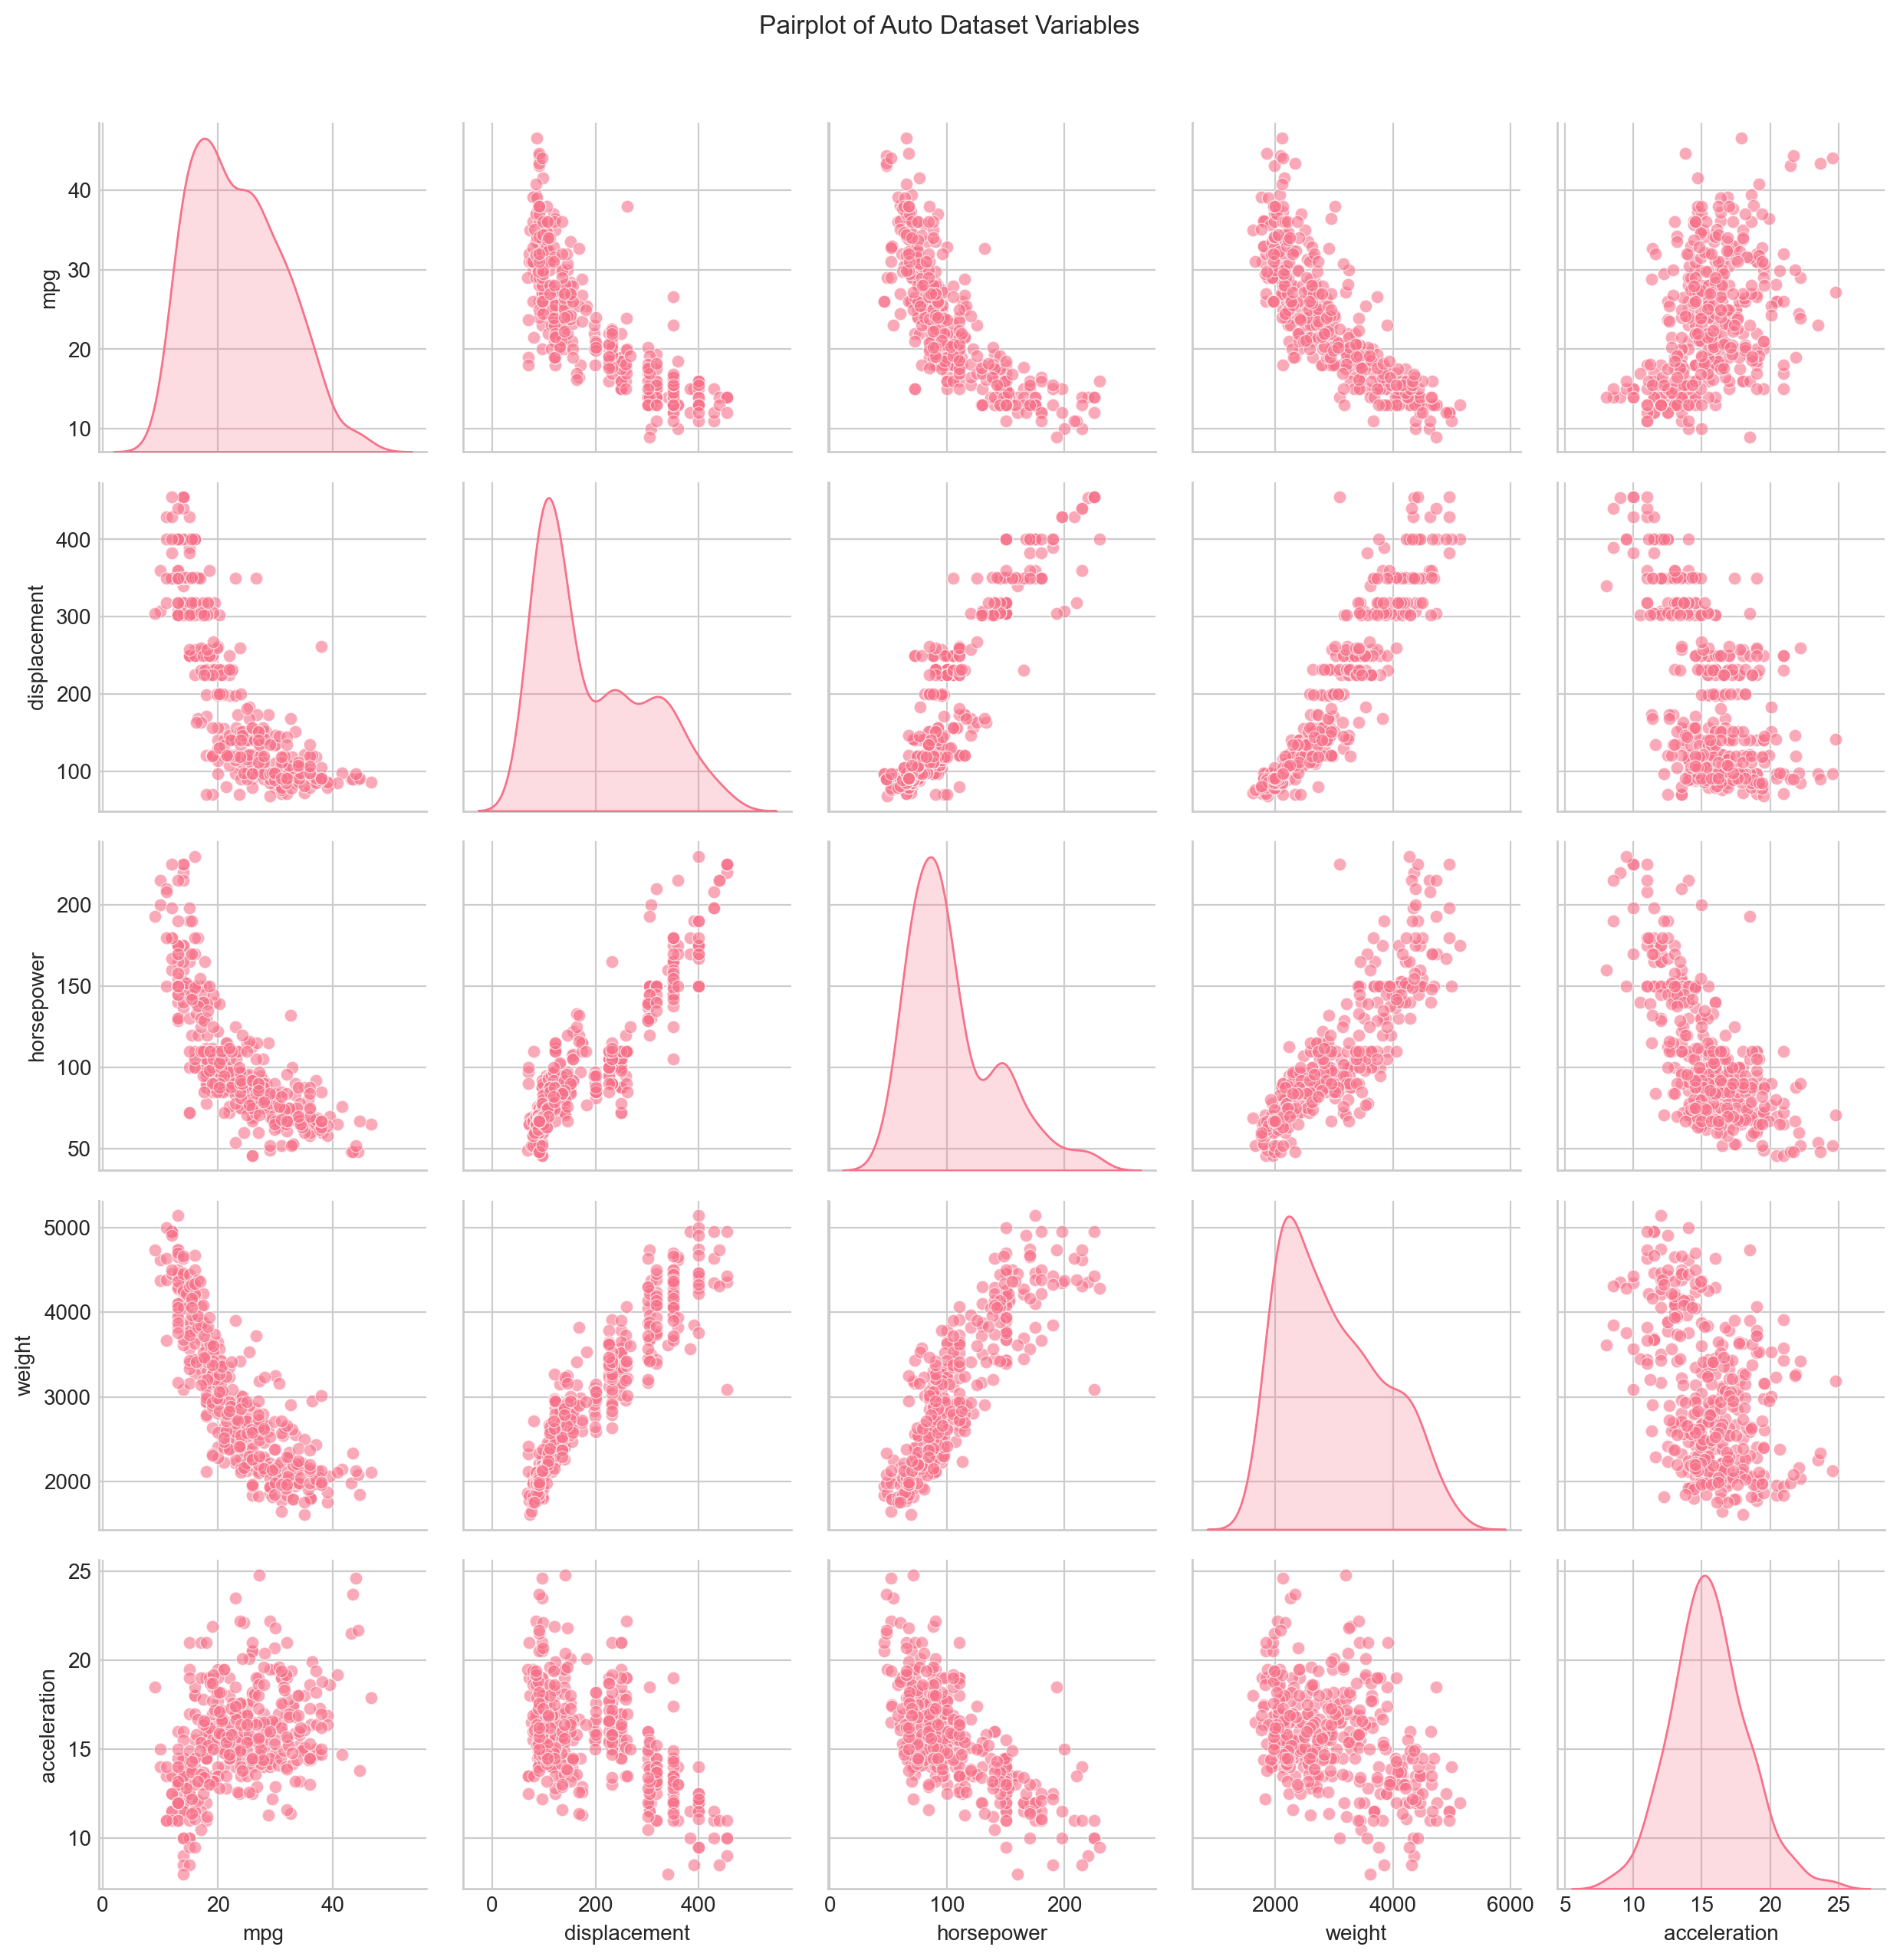

In [25]:
# Pairplot for selected variables
subset_vars = ['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']
sns.pairplot(Auto[subset_vars], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot of Auto Dataset Variables', y=1.02)
plt.tight_layout()
plt.show()

## Summary Statistics

In [26]:
# Overall summary
Auto.describe()

mpg   cylinders  displacement  horsepower       weight  \
count  392.000000  392.000000    392.000000  392.000000   392.000000   
mean    23.445918    5.471939    194.411990  104.469388  2977.584184   
std      7.805007    1.705783    104.644004   38.491160   849.402560   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.000000    4.000000    105.000000   75.000000  2225.250000   
50%     22.750000    4.000000    151.000000   93.500000  2803.500000   
75%     29.000000    8.000000    275.750000  126.000000  3614.750000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration        year      origin  
count    392.000000  392.000000  392.000000  
mean      15.541327   75.979592    1.576531  
std        2.758864    3.683737    0.805518  
min        8.000000   70.000000    1.000000  
25%       13.775000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.025000   79.000000    2.000000  
max       24.800000   82.000000    3.000000

In [28]:
# Summary for specific variable
Auto['mpg'].describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

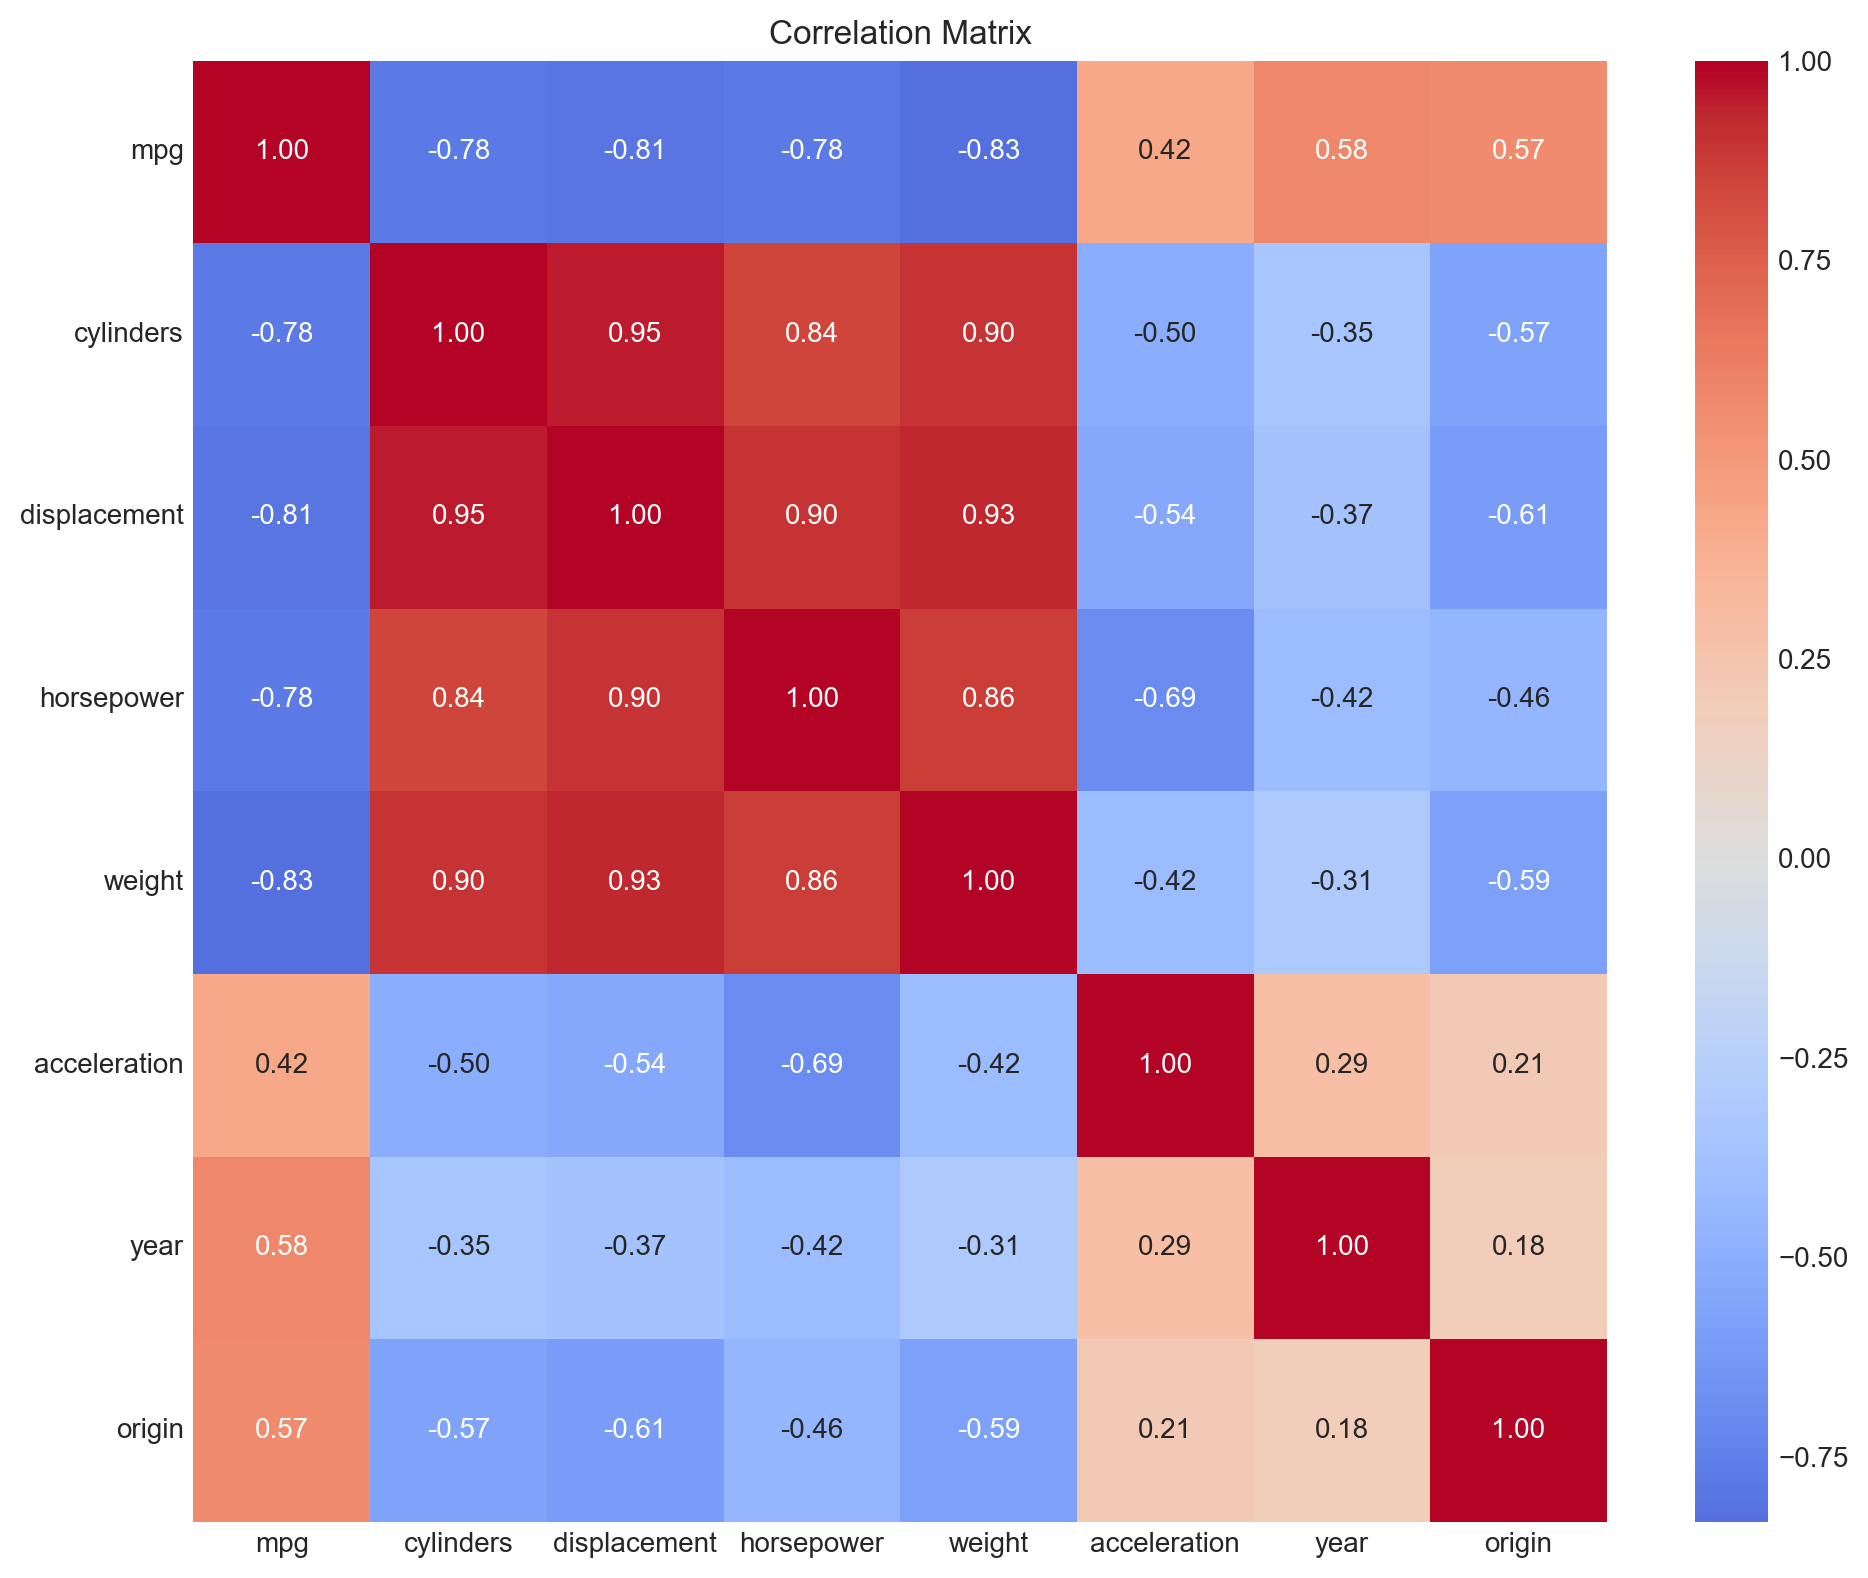

In [29]:
# Correlation matrix
numeric_cols = Auto.select_dtypes(include=[np.number]).columns
correlation = Auto[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [30]:
# Summary by groups
Auto.groupby('cylinders')['mpg'].agg(['mean', 'std', 'min', 'max', 'count'])

mean       std   min   max  count
cylinders                                        
3          20.550000  2.564501  18.0  23.7      4
4          29.283920  5.670546  18.0  46.6    199
5          27.366667  8.228204  20.3  36.4      3
6          19.973494  3.828809  15.0  38.0     83
8          14.963107  2.836284   9.0  26.6    103